In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib
from sklearn.preprocessing import LabelEncoder

In [2]:
airdf = pd.read_csv("train-2.csv")
airdf.head()

rows,columns = airdf.shape
rows,columns

(45000, 19)

### 数据清洗

In [3]:
#展示所有的缺失值的单元
missing_values = airdf.isnull().sum()
print(missing_values)

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64


In [4]:
#删除所有nan的值
airdf_cleaned = airdf.dropna()

In [5]:
#删除flight_id
airdf_cleaned = airdf_cleaned.drop('Flight_ID', axis=1)
airdf_cleaned

,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
6,Airline B,West Samanthaland,Port Brentport,3274.0,16:21,21:57,5.60,Boeing 787,0,Wednesday,January,Spring,Low,Clear,248,Special Offer,1.03,429.53
9,Airline B,Suechester,Clintonhaven,8677.0,5:32,17:01,11.49,Airbus A380,0,Friday,July,Summer,Low,Snow,236,Special Offer,0.80,652.88
10,Airline A,Larsenchester,Kathyside,2275.0,17:26,20:58,3.54,Airbus A320,0,Monday,August,Winter,Medium,Cloudy,295,Special Offer,1.11,550.52
12,Airline C,Richardsonton,Maryview,9363.0,21:22,9:24,12.04,Airbus A320,1,Thursday,April,Winter,Medium,Cloudy,243,Special Offer,1.02,825.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [6]:
#转化时间为可读模式 
#将航程小时转化成分钟
airdf_cleaned['Departure_Time'] = pd.to_datetime(airdf_cleaned['Departure_Time'], format='%H:%M').dt.time
airdf_cleaned['Arrival_Time'] = pd.to_datetime(airdf_cleaned['Arrival_Time'], format='%H:%M').dt.time
airdf_cleaned['Duration'] = airdf_cleaned['Duration'] * 60
airdf_cleaned

,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,20:28:00,01:45:00,317.4,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
6,Airline B,West Samanthaland,Port Brentport,3274.0,16:21:00,21:57:00,336.0,Boeing 787,0,Wednesday,January,Spring,Low,Clear,248,Special Offer,1.03,429.53
9,Airline B,Suechester,Clintonhaven,8677.0,05:32:00,17:01:00,689.4,Airbus A380,0,Friday,July,Summer,Low,Snow,236,Special Offer,0.80,652.88
10,Airline A,Larsenchester,Kathyside,2275.0,17:26:00,20:58:00,212.4,Airbus A320,0,Monday,August,Winter,Medium,Cloudy,295,Special Offer,1.11,550.52
12,Airline C,Richardsonton,Maryview,9363.0,21:22:00,09:24:00,722.4,Airbus A320,1,Thursday,April,Winter,Medium,Cloudy,243,Special Offer,1.02,825.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,21:49:00,03:31:00,342.0,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50:00,11:48:00,778.2,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,02:33:00,11:21:00,528.6,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,13:25:00,19:37:00,372.6,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [7]:
airdf_cleaned.rename(columns={'Duration': 'Duration_Minutes'}, inplace=True)
airdf_cleaned.head()

,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration_Minutes,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,20:28:00,01:45:00,317.4,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
6,Airline B,West Samanthaland,Port Brentport,3274.0,16:21:00,21:57:00,336.0,Boeing 787,0,Wednesday,January,Spring,Low,Clear,248,Special Offer,1.03,429.53
9,Airline B,Suechester,Clintonhaven,8677.0,05:32:00,17:01:00,689.4,Airbus A380,0,Friday,July,Summer,Low,Snow,236,Special Offer,0.80,652.88
10,Airline A,Larsenchester,Kathyside,2275.0,17:26:00,20:58:00,212.4,Airbus A320,0,Monday,August,Winter,Medium,Cloudy,295,Special Offer,1.11,550.52
12,Airline C,Richardsonton,Maryview,9363.0,21:22:00,09:24:00,722.4,Airbus A320,1,Thursday,April,Winter,Medium,Cloudy,243,Special Offer,1.02,825.53


In [8]:
airdf_cleaned.dtypes

Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration_Minutes      float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [9]:
column_names = np.array(airdf_cleaned.columns)
column_names

array(['Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration_Minutes',
       'Aircraft_Type', 'Number_of_Stops', 'Day_of_Week',
       'Month_of_Travel', 'Holiday_Season', 'Demand',
       'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'], dtype=object)

In [10]:
# 检测重复
duplicates = airdf_cleaned.duplicated().sum()
duplicates

0

In [11]:
#输出所有独立机型
unique_aircraft_types = airdf_cleaned['Aircraft_Type'].unique()
unique_aircraft_types

array(['Airbus A320', 'Boeing 787', 'Airbus A380', 'Boeing 777',
       'Boeing 737'], dtype=object)

In [12]:
#输出所有独立其他元素
unique_day_of_week = airdf_cleaned['Day_of_Week'].unique()
unique_day_of_week

array(['Wednesday', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Sunday',
       'Saturday'], dtype=object)

In [13]:
unique_month_of_travel = airdf_cleaned['Month_of_Travel'].unique()
unique_month_of_travel

array(['March', 'January', 'July', 'August', 'April', 'December',
       'November', 'September', 'May', 'February', 'June', 'October'],
      dtype=object)

In [14]:
unique_holiday_season = airdf_cleaned['Holiday_Season'].unique()
unique_holiday_season

array(['Spring', 'Summer', 'Winter', 'Fall', 'None'], dtype=object)

In [15]:
unique_demand = airdf_cleaned['Demand'].unique()
unique_demand

array(['Low', 'Medium', 'High'], dtype=object)

In [16]:
unique_weather_conditions = airdf_cleaned['Weather_Conditions'].unique()
unique_weather_conditions

array(['Rain', 'Clear', 'Snow', 'Cloudy'], dtype=object)

In [17]:
promotion_type = airdf_cleaned['Promotion_Type'].unique()
promotion_type

array(['None', 'Special Offer', 'Discount'], dtype=object)

In [19]:
unique_airline = airdf_cleaned['Airline'].unique()
unique_airline

array(['Airline C', 'Airline B', 'Airline A'], dtype=object)

In [21]:
encoder = LabelEncoder()
airdf_cleaned['Aircraft_Type'] = encoder.fit_transform(airdf_cleaned['Aircraft_Type'])
airdf_cleaned['Day_of_Week'] = encoder.fit_transform(airdf_cleaned['Day_of_Week'])
airdf_cleaned['Month_of_Travel'] = encoder.fit_transform(airdf_cleaned['Month_of_Travel'])
airdf_cleaned['Holiday_Season'] = encoder.fit_transform(airdf_cleaned['Holiday_Season'])
airdf_cleaned['Demand'] = encoder.fit_transform(airdf_cleaned['Demand'])
airdf_cleaned['Weather_Conditions'] = encoder.fit_transform(airdf_cleaned['Weather_Conditions'])
airdf_cleaned['Promotion_Type'] = encoder.fit_transform(airdf_cleaned['Promotion_Type'])
airdf_cleaned['Airline'] = encoder.fit_transform(airdf_cleaned['Airline'])
airdf_cleaned.head()


,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration_Minutes,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,2,Leonardland,New Stephen,2942.0,20:28:00,01:45:00,317.4,0,0,6,7,2,1,2,107,1,1.08,423.13
6,1,West Samanthaland,Port Brentport,3274.0,16:21:00,21:57:00,336.0,4,0,6,4,2,1,0,248,2,1.03,429.53
9,1,Suechester,Clintonhaven,8677.0,05:32:00,17:01:00,689.4,1,0,0,5,3,1,3,236,2,0.80,652.88
10,0,Larsenchester,Kathyside,2275.0,17:26:00,20:58:00,212.4,0,0,1,1,4,2,1,295,2,1.11,550.52
12,2,Richardsonton,Maryview,9363.0,21:22:00,09:24:00,722.4,0,1,4,0,4,2,1,243,2,1.02,825.53


In [22]:
airdf_cleaned.dtypes

Airline                 int64
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration_Minutes      float64
Aircraft_Type           int64
Number_of_Stops         int64
Day_of_Week             int64
Month_of_Travel         int64
Holiday_Season          int64
Demand                  int64
Weather_Conditions      int64
Passenger_Count         int64
Promotion_Type          int64
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [24]:
airdf_cleaned = airdf_cleaned.drop(['Departure_City','Arrival_City', 'Departure_Time', 'Arrival_Time'], axis=1)
airdf_cleaned.head()

,Airline,Distance,Duration_Minutes,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,2,2942.0,317.4,0,0,6,7,2,1,2,107,1,1.08,423.13
6,1,3274.0,336.0,4,0,6,4,2,1,0,248,2,1.03,429.53
9,1,8677.0,689.4,1,0,0,5,3,1,3,236,2,0.80,652.88
10,0,2275.0,212.4,0,0,1,1,4,2,1,295,2,1.11,550.52
12,2,9363.0,722.4,0,1,4,0,4,2,1,243,2,1.02,825.53


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = airdf_cleaned.drop('Flight_Price', axis=1)  #feature
y = airdf_cleaned['Flight_Price']  # target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Mean Squared Error: 399.6402825283269
Root Mean Squared Error (RMSE): 19.991005040475752


In [35]:
feature_importance = model.feature_importances_
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importance)}

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

sorted_feature_importance


[('Distance', 0.5340923950674038),
 ('Demand', 0.18908066507403654),
 ('Fuel_Price', 0.1237027527514309),
 ('Duration_Minutes', 0.07053863471440766),
 ('Number_of_Stops', 0.04252844317333366),
 ('Month_of_Travel', 0.022326583474288397),
 ('Day_of_Week', 0.011637373112778158),
 ('Passenger_Count', 0.002380408560173663),
 ('Holiday_Season', 0.0009606146204941929),
 ('Aircraft_Type', 0.000890561785905709),
 ('Promotion_Type', 0.0006663337644430938),
 ('Airline', 0.0006654828286120086),
 ('Weather_Conditions', 0.0005297510726920934)]

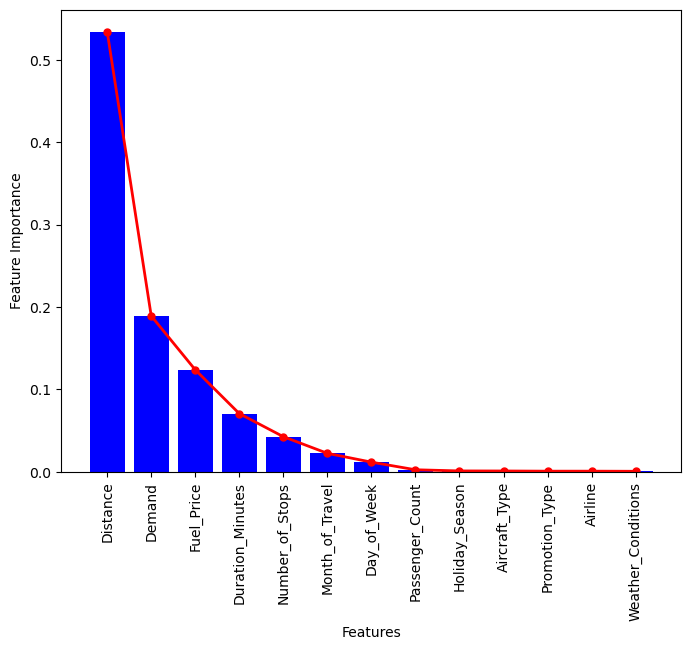

In [43]:
features, importances = zip(*sorted_feature_importance)

plt.figure(figsize=(8, 6))
bars = plt.bar(features, importances, color='blue')
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
plt.plot(bar_centers, importances, color='red', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.ylabel('Feature Importance')  
plt.xlabel('Features')  
plt.xticks(rotation=90) 
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 15.285046880955413
R² Score: 0.9844551333347755


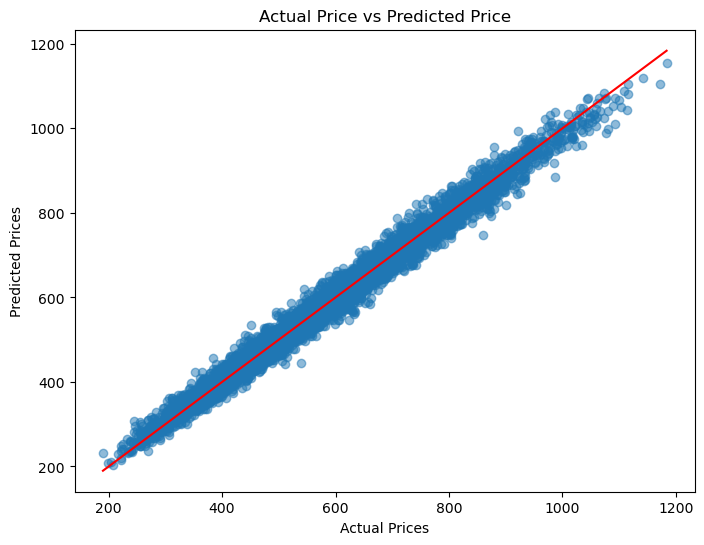

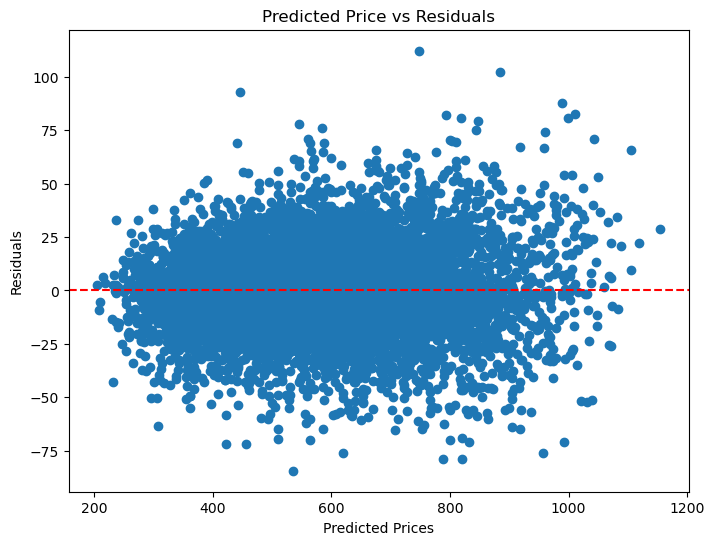

In [33]:
import matplotlib.pyplot as plt

# 散点对比图
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()

# 残差图
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Predicted Price vs Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
